In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob


# Task #1: Merge the 12 months of sales data into a single csv file  


In [ ]:
df = pd.read_csv("/content/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
file_paths = glob.glob("/content/*.csv")

df_list = [pd.read_csv(file) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)



#Raed in updated dataframe


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#Clean Data
Drop rows of NAN

In [ ]:
df.isna().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [ ]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df= df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Get rid of text in order date column

find 'Or' and delete it


In [ ]:
temp_df = df[df['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [ ]:
df = df[df['Order Date'].str[0:2]!='Or']

Make columns correct type


In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

#Augment data with additional columns
##task-2: Add month column


In [ ]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')


##task-3: Add a Sales Colums

In [ ]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(12)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,column,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,Atlanta
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,New York City
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12,11.95,Portland,Portland
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,Dallas
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,Dallas
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,Dallas


##Task-4: Add city column

In [ ]:
def get_city(address):
  return address.split(",")[1]

def get_state(address):
  return address.split(",")[2].strip(" ").split(" ")[0]

df['City'] = df['Purchase Address'].apply(lambda x: f" {get_city(x)}  ({get_state(x)})")


df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


#Question 1: What was the best month for sales? How much was earned that month?

In [ ]:
result = df.groupby(['Month']).sum(numeric_only=True)


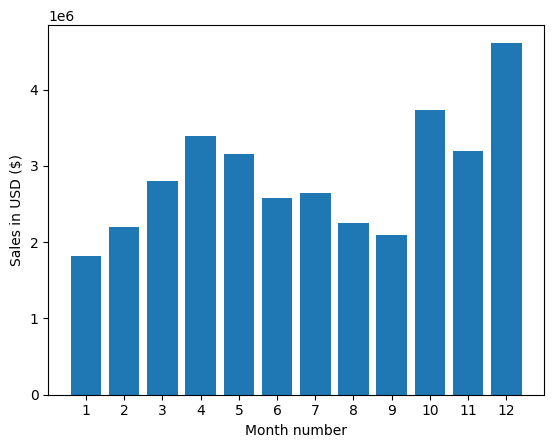

In [ ]:
months = range(1,13)

plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()





# Question 2: What city sold the most product?

In [ ]:
result = df.groupby(['City']).sum()['Sales'].sort_values(ascending=False)
result

,Sales
City,
San Francisco (CA),8262203.91
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Boston (MA),3661642.01
Atlanta (GA),2795498.58
Dallas (TX),2767975.40
Seattle (WA),2747755.48
Portland (OR),1870732.34
Austin (TX),1819581.75


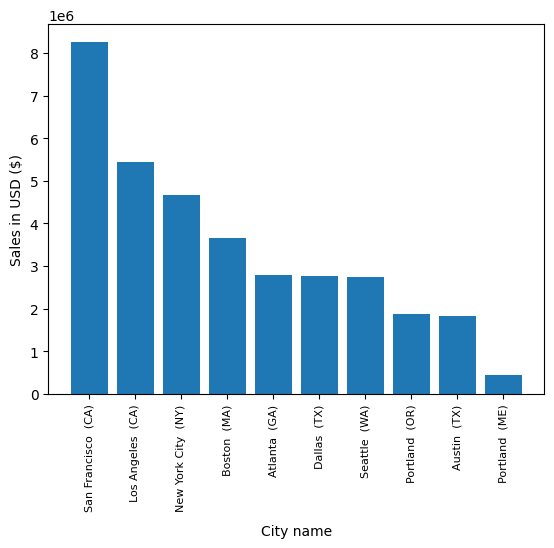

In [ ]:

plt.bar(result.index, result)
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-68-f5779b1b9e1a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [ ]:
result = df.groupby(['Hour']).count()
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


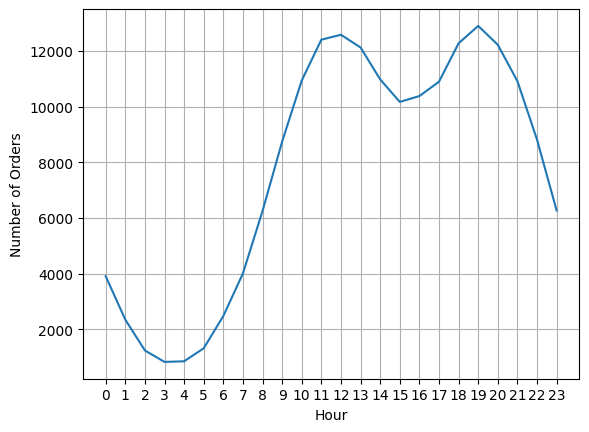

In [ ]:
plt.plot(result.index, result['Order ID'])
plt.xticks(result.index)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

# Question 4: What products are most often sold together?

In [ ]:
df1 = df[df['Order ID'].duplicated(keep=False)]



In [ ]:
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df1 = df1[['Order ID', 'Grouped']].drop_duplicates()

df1.head()

<ipython-input-98-97ec4cf70148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [ ]:
from collections import Counter
from itertools import combinations

count = Counter()

for row in df1['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# What product sold the most? Why do you think it sold the most?

In [ ]:
result = df.groupby(['Product']).sum(numeric_only=True)['Quantity Ordered']

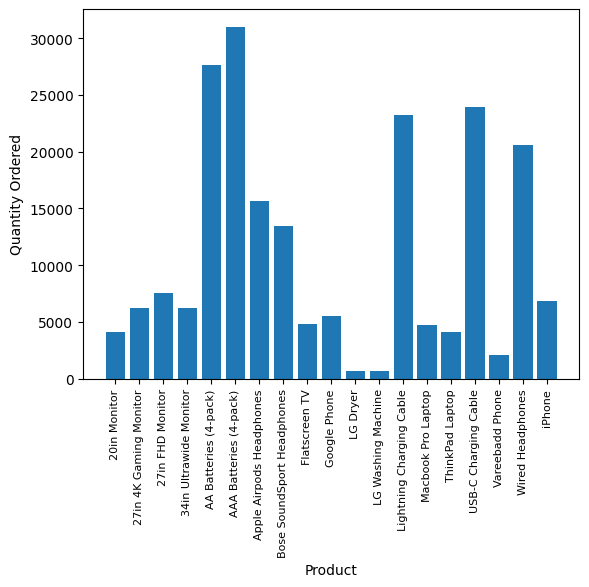

In [ ]:
plt.bar(result.index, result)
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

In [ ]:
prices = df.groupby(['Product']).sum(numeric_only=True)['Price Each']/df.groupby(['Product']).sum(numeric_only=True)['Quantity Ordered']

In [ ]:
prices

,0
Product,
20in Monitor,109.244124
27in 4K Gaming Monitor,389.115583
27in FHD Monitor,149.135752
34in Ultrawide Monitor,378.886625
AA Batteries (4-pack),2.859261
AAA Batteries (4-pack),1.989767
Apple Airpods Headphones,148.927272
Bose SoundSport Headphones,99.009196
Flatscreen TV,298.817182


<ipython-input-124-1a927410e6e1>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(result.index, rotation='vertical', size=8)


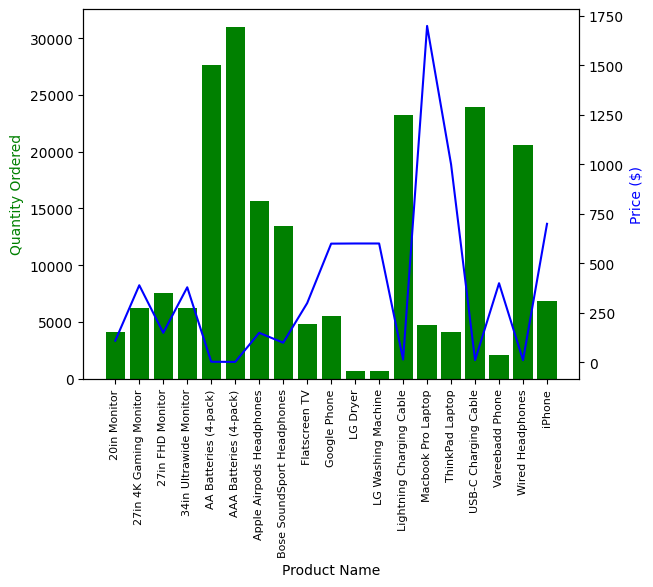

In [ ]:


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(result.index, result, color='g')
ax2.plot(prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(result.index, rotation='vertical', size=8)

fig.show()